In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
import os
import glob
from google.colab import drive

## load train, test and validation label arrays
drive = drive.mount('/content/drive', force_remount = True)

Mounted at /content/drive


# Berlin Crime Data

In [ ]:
path = 'drive/MyDrive/Colab Notebooks/BI/data/'
df_cr = pd.read_csv(path+'Berlin_crimes.csv', encoding="utf-8", parse_dates=['Year'])
df_cr.head()

,Year,District,Code,Location,Robbery,Street_robbery,Injury,Agg_assault,Threat,Theft,Car,From_car,Bike,Burglary,Fire,Arson,Damage,Graffiti,Drugs,Local
0,2012-01-01,Mitte,10111,Tiergarten Süd,70,46,586,194,118,2263,18,328,120,68,16,4,273,26,171,1032
1,2012-01-01,Mitte,10112,Regierungsviertel,65,29,474,123,142,3203,10,307,170,37,10,4,380,124,98,870
2,2012-01-01,Mitte,10113,Alexanderplatz,242,136,1541,454,304,8988,81,792,822,275,49,27,1538,522,435,3108
3,2012-01-01,Mitte,10114,Brunnenstraße Süd,52,25,254,60,66,1916,86,192,396,131,14,5,428,122,213,752
4,2012-01-01,Mitte,10221,Moabit West,130,51,629,185,199,2470,94,410,325,161,42,22,516,64,259,1403


In [ ]:
df_cr.shape

(1200, 20)

In [ ]:
df_cr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Year            1200 non-null   datetime64[ns]
 1   District        1200 non-null   object        
 2   Code            1200 non-null   int64         
 3   Location        1200 non-null   object        
 4   Robbery         1200 non-null   int64         
 5   Street_robbery  1200 non-null   int64         
 6   Injury          1200 non-null   int64         
 7   Agg_assault     1200 non-null   int64         
 8   Threat          1200 non-null   int64         
 9   Theft           1200 non-null   int64         
 10  Car             1200 non-null   int64         
 11  From_car        1200 non-null   int64         
 12  Bike            1200 non-null   int64         
 13  Burglary        1200 non-null   int64         
 14  Fire            1200 non-null   int64         
 15  Arso

Note: no null values need to be handled, no data type changed

In [ ]:
df_cr['District'].unique()

array(['Mitte', 'Friedrichshain-Kreuzberg', 'Pankow',
       'Charlottenburg-Wilmersdorf', 'Spandau', 'Steglitz-Zehlendorf',
       'Tempelhof-Schöneberg', 'Neukölln', 'Treptow-Köpenick',
       'Marzahn-Hellersdorf', 'Lichtenberg', 'Reinickendorf'],
      dtype=object)

Robbery


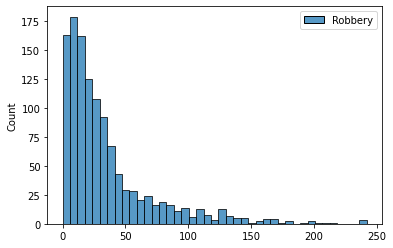

Street_robbery


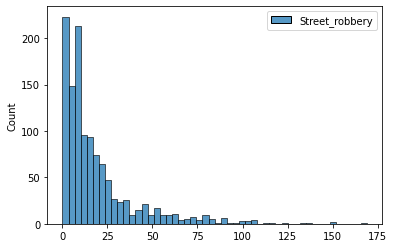

Injury


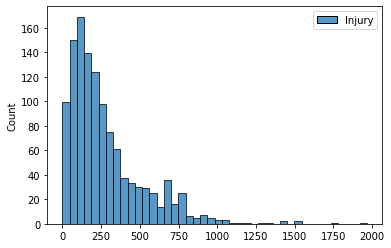

Agg_assault


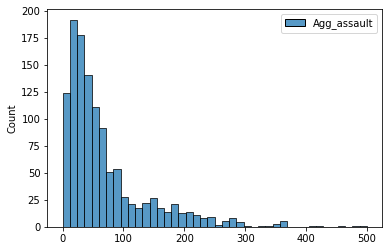

Threat


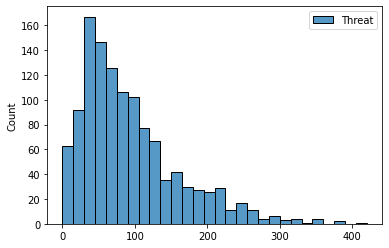

Theft


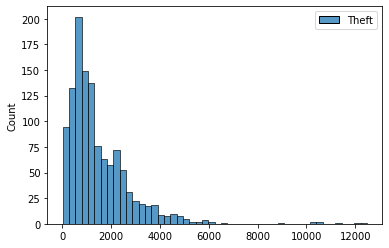

Car


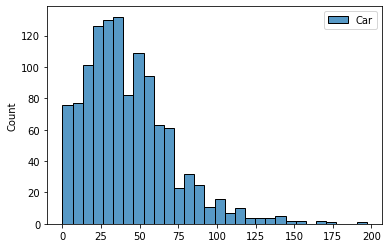

From_car


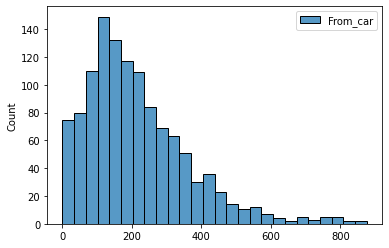

Bike


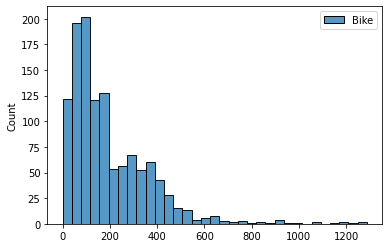

Burglary


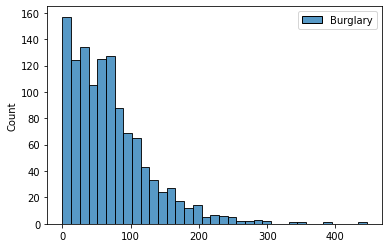

Fire


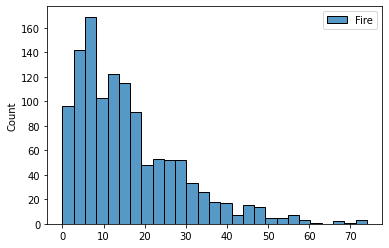

Arson


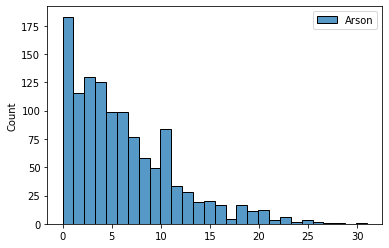

Damage


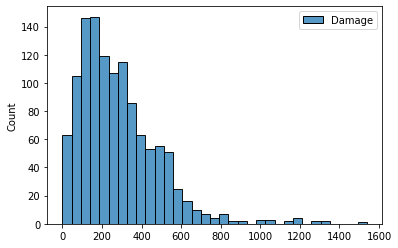

Graffiti


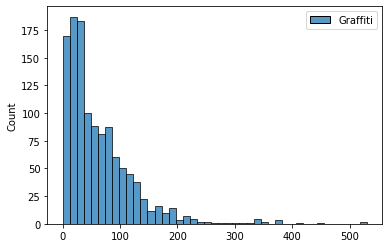

Drugs


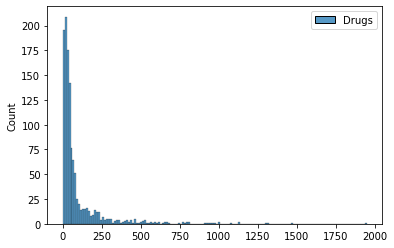

Local


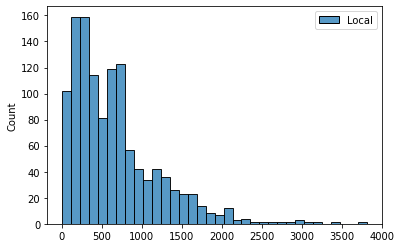

In [ ]:
crimes = ['Robbery','Street_robbery','Injury','Agg_assault','Threat','Theft','Car','From_car','Bike','Burglary','Fire','Arson','Damage','Graffiti','Drugs','Local']

for col in crimes:
  print(col)
  sns.histplot(df_cr[[col]])
  plt.show()

In [ ]:
berlin_district_crime = df_cr.melt(id_vars=["Year", 'District',"Code", 'Location'], 
                                var_name="Crime", 
                                value_name="Value")
berlin_district_crime.to_csv('berlin_district_crime.csv')
berlin_district_crime

,Year,District,Code,Location,Crime,Value
0,2012-01-01,Mitte,10111,Tiergarten Süd,Robbery,70
1,2012-01-01,Mitte,10112,Regierungsviertel,Robbery,65
2,2012-01-01,Mitte,10113,Alexanderplatz,Robbery,242
3,2012-01-01,Mitte,10114,Brunnenstraße Süd,Robbery,52
4,2012-01-01,Mitte,10221,Moabit West,Robbery,130
...,...,...,...,...,...,...
19195,2019-01-01,Reinickendorf,123012,Nord 2 - Waidmannslust/Wittenau/Lübars,Local,728
19196,2019-01-01,Reinickendorf,123021,MV 1 - Märkisches Viertel,Local,986
19197,2019-01-01,Reinickendorf,123022,MV 2 - Rollbergsiedlung,Local,212
19198,2019-01-01,Reinickendorf,123043,West 3 - Borsigwalde/Freie Scholle,Local,218


### Checking the Berlin-wide development of crime statistics

In [ ]:
## checking the Berlin-wide development of crime statistics in a table

berlin_crime = df_cr.groupby(by=['Year']).sum().reset_index()
berlin_crime = berlin_crime.melt(id_vars=["Year", "Code"], 
                                var_name="Date", 
                                value_name="Value")
berlin_crime.to_csv('berlin_crime.csv')
berlin_crime


,Year,Code,Date,Value
0,2012-01-01,10053418,Robbery,6283
1,2013-01-01,10053418,Robbery,6088
2,2014-01-01,10053418,Robbery,5583
3,2015-01-01,10053418,Robbery,5318
4,2016-01-01,10053418,Robbery,5046
...,...,...,...,...
123,2015-01-01,10053418,Local,100220
124,2016-01-01,10053418,Local,100073
125,2017-01-01,10053418,Local,95027
126,2018-01-01,10053418,Local,97763


Robbery


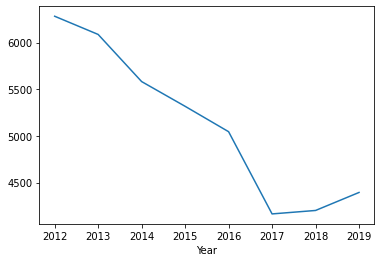

Street_robbery


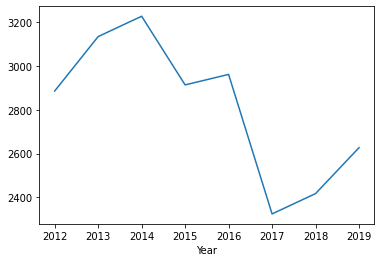

Injury


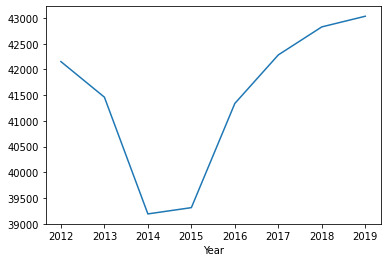

Agg_assault


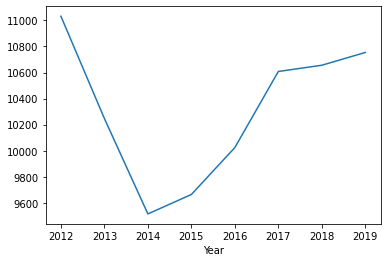

Threat


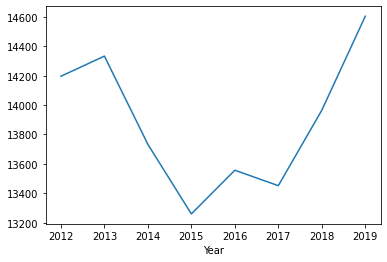

Theft


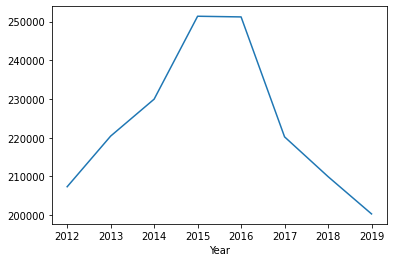

Car


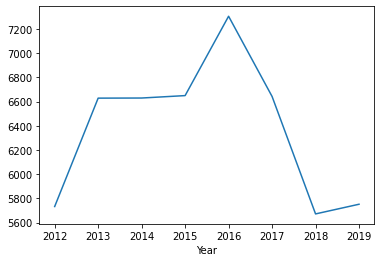

From_car


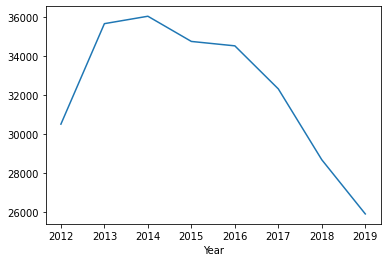

Bike


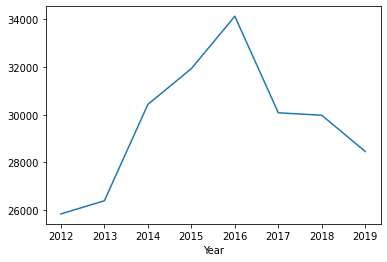

Burglary


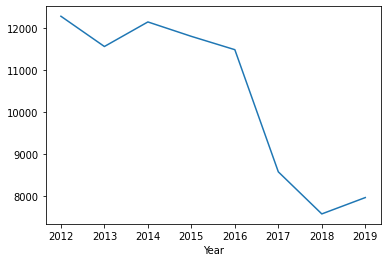

Fire


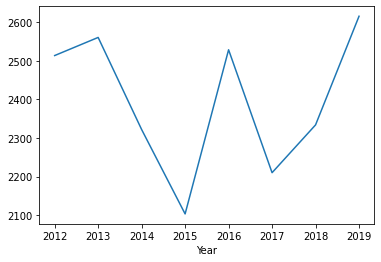

Arson


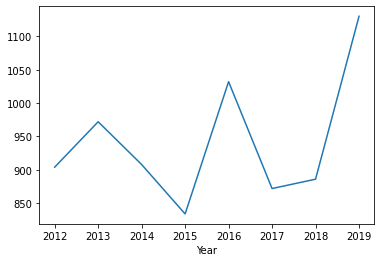

Damage


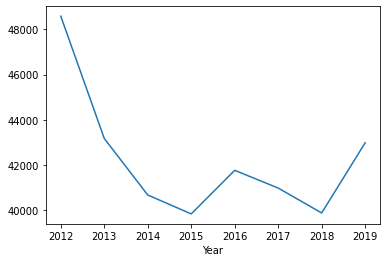

Graffiti


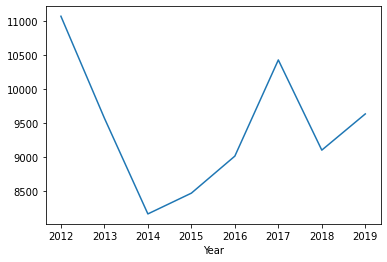

Drugs


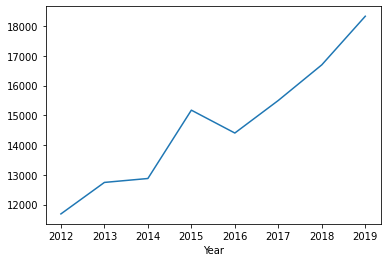

Local


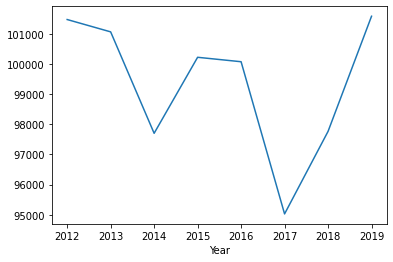

In [ ]:
## and in graphs

fig, ax = plt.subplots(figsize=(6,4))

for col in crimes:
  print(col)
  df_cr.groupby('Year')[col].sum().plot()
  plt.show()

LinAlgError: ignored

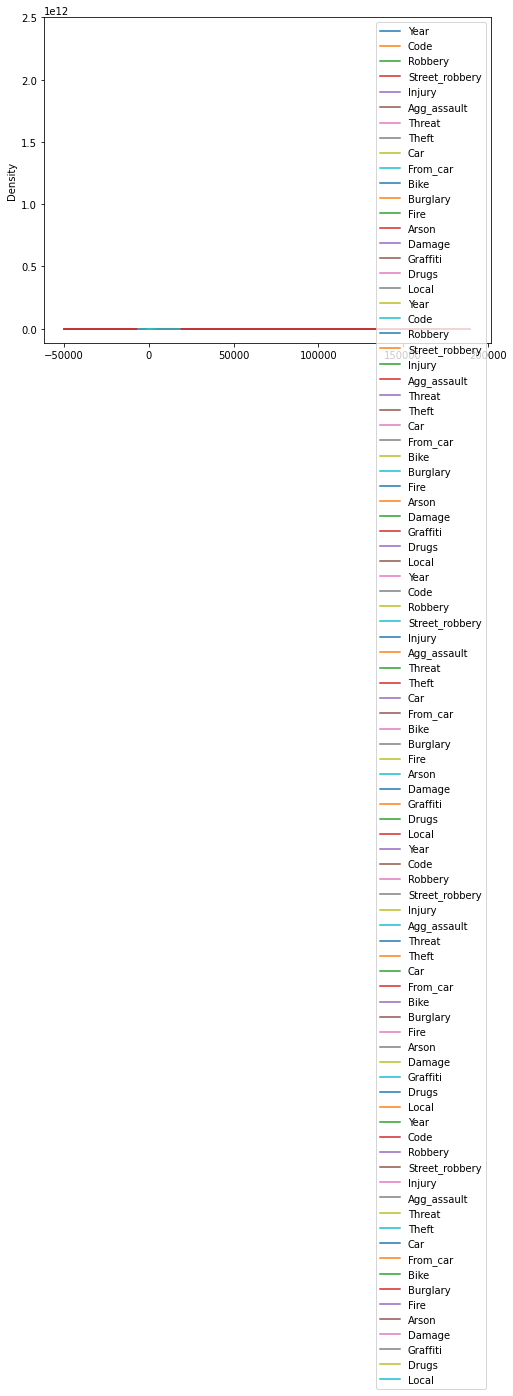

In [ ]:
fig, ax = plt.subplots(figsize=(8,6))
for label, df in df_cr.groupby('Year'):
    df.plot(kind="kde", ax=ax, label=label)
plt.legend()

### Checking the crime stats by district

In [ ]:
crime_districts_years = df_cr.groupby(by=['District','Year']).sum()
crime_districts_years

Code  Robbery  ...  Drugs  Local
District                   Year                          ...              
Charlottenburg-Wilmersdorf 2012-01-01   735953      643  ...   1064   9997
                           2013-01-01   735953      639  ...   1180  10062
                           2014-01-01   735953      641  ...   1208  10047
                           2015-01-01   735953      536  ...    885  10407
                           2016-01-01   735953      523  ...    948   9441
...                                        ...      ...  ...    ...    ...
Treptow-Köpenick           2015-01-01  1906110      197  ...    517   4798
                           2016-01-01  1906110      146  ...    371   4979
                           2017-01-01  1906110      200  ...    495   5042
                           2018-01-01  1906110      216  ...    574   5337
                           2019-01-01  1906110      169  ...    633   5816

[96 rows x 17 columns]

In [ ]:
crime_years_districts = df_cr.groupby(by=['Year','District']).sum()


Code  Robbery  ...  Drugs  Local
Year District                                      ...              
2012 Charlottenburg-Wilmersdorf   735953      643  ...   1064   9997
     Friedrichshain-Kreuzberg     192636      868  ...   1853  11001
     Lichtenberg                 1553791      260  ...    335   6252
     Marzahn-Hellersdorf         1011945      331  ...    308   6202
     Mitte                        122339     1253  ...   2849  16545
...                                  ...      ...  ...    ...    ...
2019 Reinickendorf               1475044      236  ...    843   5717
     Spandau                      511845      211  ...    606   5941
     Steglitz-Zehlendorf          551936      217  ...    412   4876
     Tempelhof-Schöneberg         572728      352  ...   1209   8879
     Treptow-Köpenick            1906110      169  ...    633   5816

[96 rows x 17 columns]

In [ ]:
df_cr[df_cr['Year']==2012].groupby(by=['Year','District']).sum()

Code  Robbery  ...  Drugs  Local
Year District                                      ...              
2012 Charlottenburg-Wilmersdorf   735953      643  ...   1064   9997
     Friedrichshain-Kreuzberg     192636      868  ...   1853  11001
     Lichtenberg                 1553791      260  ...    335   6252
     Marzahn-Hellersdorf         1011945      331  ...    308   6202
     Mitte                        122339     1253  ...   2849  16545
     Neukölln                     891955      767  ...   1578  11342
     Pankow                       527136      410  ...    522   8441
     Reinickendorf               1475044      337  ...   1024   6815
     Spandau                      511845      359  ...    481   7225
     Steglitz-Zehlendorf          551936      284  ...    298   4818
     Tempelhof-Schöneberg         572728      546  ...   1066   8263
     Treptow-Köpenick            1906110      225  ...    309   4571

[12 rows x 17 columns]

### Time-Series Prediction

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
#X = Data.drop(['name of the target column'],axis=1).values
#y = Data['name of the target column'].values
#X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)

In [ ]:
from dateutil.parser import parse 
from statsmodels.tsa.seasonal import seasonal_decompose
plt.rcParams.update({'figure.figsize': (10, 7), 'figure.dpi': 120})
import matplotlib as mpl


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


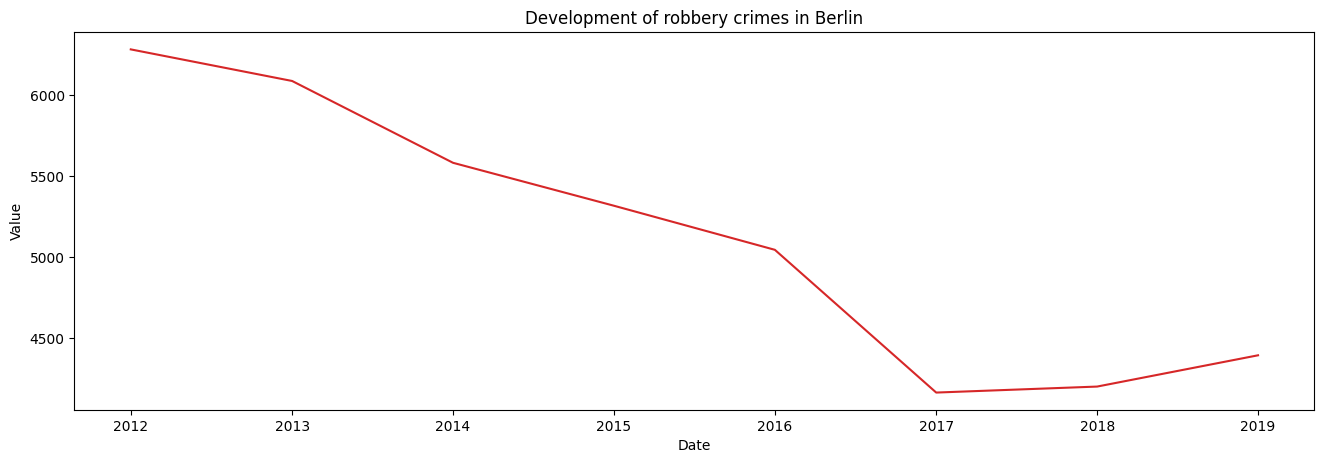

In [ ]:
# Draw Plot
def plot_df(berlin_crime, x, y, title="", xlabel='Date', ylabel='Value', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_df(berlin_crime, x=berlin_crime.Year, y=berlin_crime.Robbery, title='Development of robbery crimes in Berlin')    

In [ ]:
## saving the groupby statement as csv with Year as index
bc = df_cr.groupby(by=['Year']).sum()
bc.head()



KeyError: ignored

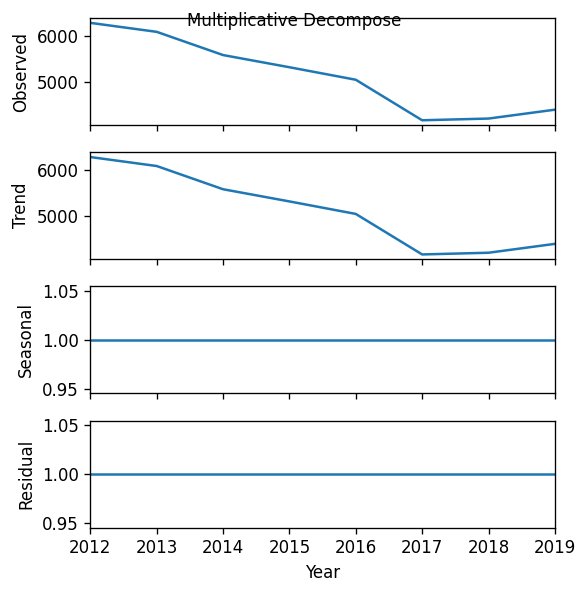

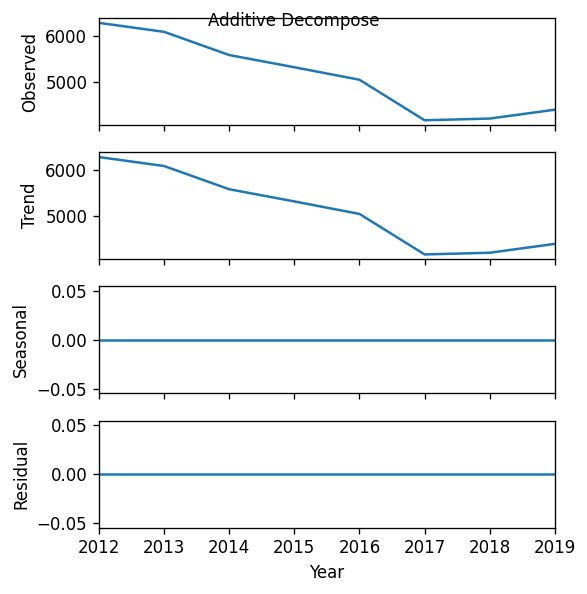

In [ ]:
## Checking the components of the Time Series

# Import Data
df = pd.read_csv(path+'berlin_crime.csv', parse_dates=['Year'], index_col='Year')

# Multiplicative Decomposition 
result_mul = seasonal_decompose(df['Robbery'], model='multiplicative', extrapolate_trend='freq')

# Additive Decomposition
result_add = seasonal_decompose(df['Robbery'], model='additive', extrapolate_trend='freq')

# Plot
plt.rcParams.update({'figure.figsize': (5,5)})
result_mul.plot().suptitle('Multiplicative Decompose', fontsize=10)
result_add.plot().suptitle('Additive Decompose', fontsize=10)
plt.show()

In [ ]:
## checking for stationarity

from statsmodels.tsa.stattools import adfuller, kpss

# ADF Test
result = adfuller(df.Robbery.values, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: 0.7088133399789415
p-value: 0.9900121236391749
Critial Values:
   1%, -6.045114
Critial Values:
   5%, -3.9292800000000003
Critial Values:
   10%, -2.98681


# Berlin Airbnb Data

### Neighbourhoods

In [ ]:
## loading the neighbourhoods
df_n = pd.read_csv(path+'berlin_neighbourhoods3.csv', encoding="utf-8")
df_n.head()

,city,neighbourhood_group,neighbourhood,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,Berlin,Charlottenburg-Wilm.,Barstraße,NaN,NaN,NaN,NaN
1,Berlin,Charlottenburg-Wilm.,Charlottenburg Nord,NaN,NaN,NaN,NaN
2,Berlin,Charlottenburg-Wilm.,Düsseldorfer Straße,NaN,NaN,NaN,NaN
3,Berlin,Charlottenburg-Wilm.,Forst Grunewald,NaN,NaN,NaN,NaN
4,Berlin,Charlottenburg-Wilm.,Grunewald,NaN,NaN,NaN,NaN


In [ ]:
## dropping the extra columns
df_n = df_n.drop(['Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6'], axis=1)
df_n.head(1)

,city,neighbourhood_group,neighbourhood
0,Berlin,Charlottenburg-Wilm.,Barstraße


In [ ]:
df_n.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   city                 138 non-null    object
 1   neighbourhood_group  138 non-null    object
 2   neighbourhood        138 non-null    object
dtypes: object(3)
memory usage: 3.4+ KB


### Calendar

In [ ]:
## loading the calendar
df_c = pd.read_csv(path+'calendar_summary.csv', encoding="utf-8")
df_c.head()

,listing_id,date,available,price
0,2015,2019-09-10,f,NaN
1,2015,2019-09-09,f,NaN
2,2015,2019-09-08,f,NaN
3,2015,2019-09-07,f,NaN
4,2015,2019-09-06,f,NaN


In [ ]:
df_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8231480 entries, 0 to 8231479
Data columns (total 4 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   listing_id  int64 
 1   date        object
 2   available   object
 3   price       object
dtypes: int64(1), object(3)
memory usage: 251.2+ MB


We see that the date column is in string format, thus we change it:

In [ ]:
df_c['date'] = pd.to_datetime(df_c['date'])

In [ ]:
##validity check
df_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8231480 entries, 0 to 8231479
Data columns (total 4 columns):
 #   Column      Dtype         
---  ------      -----         
 0   listing_id  int64         
 1   date        datetime64[ns]
 2   available   object        
 3   price       object        
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 251.2+ MB


In [ ]:
## somehow it doesn't show the number of null valeus

print('number of null entries in listing_id column: ', df_c.listing_id.isna().sum())
print('number of null entries in date column: ', df_c.date.isna().sum())
print('number of null entries in "available" column: ', df_c.available.isna().sum())
print('number of null entries in price column: ', df_c.price.isna().sum())
print()

## check an example value
df_c[df_c.price.notnull()].head(1)

number of null entries in listing_id column:  0
number of null entries in date column:  0
number of null entries in "available" column:  0
number of null entries in price column:  6430639



,listing_id,date,available,price
128,2015,2019-05-05,t,$76.00


In [ ]:
## changing the last column to float values, including stripping the $ sign
# needs to fill NA values for the strip method to work
df_c['price'] = df_c['price'].fillna("$0.00")
df_c['price'] = df_c['price'].apply(lambda x: x.strip("$"))
df_c['price'] = df_c['price'].apply(lambda x: x.replace(",",""))
df_c['price'] = df_c['price'].astype(float)
print(df_c.head(1))
print()
df_c.info()

## do we need to change back the 0.00 values to NAs?

   listing_id       date available  price
0        2015 2019-09-10         f    0.0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8231480 entries, 0 to 8231479
Data columns (total 4 columns):
 #   Column      Dtype         
---  ------      -----         
 0   listing_id  int64         
 1   date        datetime64[ns]
 2   available   object        
 3   price       float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 251.2+ MB


### Reviews

In [ ]:
## loading the reviews
df_r = pd.read_csv(path+'reviews.csv', encoding="utf-8")
df_r.head()

,listing_id,date
0,2015,2016-04-11
1,2015,2016-04-15
2,2015,2016-04-26
3,2015,2016-05-10
4,2015,2016-05-14


In [ ]:
df_r.shape

(401963, 2)

In [ ]:
df_r.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401963 entries, 0 to 401962
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   listing_id  401963 non-null  int64 
 1   date        401963 non-null  object
dtypes: int64(1), object(1)
memory usage: 6.1+ MB


In [ ]:
## changing the date colun to datetime type
df_r['date'] = pd.to_datetime(df_r['date'])

In [ ]:
df_r['date'].max()

Timestamp('2018-11-07 00:00:00')

### Reviews Summary

In [ ]:
## loading the reviews summary
df_rs = pd.read_csv(path+'reviews_summary.csv', encoding="utf-8")
df_rs.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,2015,69544350,2016-04-11,7178145,Rahel,Mein Freund und ich hatten gute gemütliche vie...
1,2015,69990732,2016-04-15,41944715,Hannah,Jan was very friendly and welcoming host! The ...
2,2015,71605267,2016-04-26,30048708,Victor,Un appartement tres bien situé dans un quartie...
3,2015,73819566,2016-05-10,63697857,Judy,"It is really nice area, food, park, transport ..."
4,2015,74293504,2016-05-14,10414887,Romina,"Buena ubicación, el departamento no está orden..."


In [ ]:
df_rs.shape

(401963, 6)

In [ ]:
df_rs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401963 entries, 0 to 401962
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   listing_id     401963 non-null  int64 
 1   id             401963 non-null  int64 
 2   date           401963 non-null  object
 3   reviewer_id    401963 non-null  int64 
 4   reviewer_name  401963 non-null  object
 5   comments       401467 non-null  object
dtypes: int64(3), object(3)
memory usage: 18.4+ MB


In [ ]:
## changing date column to datetime type
df_rs['date'] = pd.to_datetime(df_rs['date'])

In [ ]:
## looking at null values in the comments column
print('NA values in comments column: ',df_rs['comments'].isna().sum())
print()
df_rs[df_rs['comments'].isna()]

NA values in comments column:  496



,listing_id,id,date,reviewer_id,reviewer_name,comments
3049,42809,160781,2010-12-31,226667,Frank,NaN
4316,63468,75695155,2016-05-22,26052219,Sebastian,NaN
7984,139769,10110711,2014-01-31,10977586,Mark,NaN
8411,153015,234852734,2018-02-14,165971645,Chiara,NaN
10960,183918,11107030,2014-03-21,11014142,Andrea,NaN
...,...,...,...,...,...,...
396220,27121614,299990429,2018-08-01,131384962,Sophie,NaN
396845,27333815,308932943,2018-08-17,136532584,Benjamin,NaN
398593,27768989,313279351,2018-08-25,87482774,Pierre,NaN
399497,28042735,323947087,2018-09-16,211975082,Jennifer,NaN


For now we decide to not do anything about these entries.

### Listings

In [ ]:
## loading the listings
df_l = pd.read_csv(path+'listings.csv', encoding="utf-8")
df_l.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2015,Berlin-Mitte Value! Quiet courtyard/very central,2217,Ian,Mitte,Brunnenstr. Süd,52.534537,13.402557,Entire home/apt,60,4,118,2018-10-28,3.76,4,141
1,2695,Prenzlauer Berg close to Mauerpark,2986,Michael,Pankow,Prenzlauer Berg Nordwest,52.548513,13.404553,Private room,17,2,6,2018-10-01,1.42,1,0
2,3176,Fabulous Flat in great Location,3718,Britta,Pankow,Prenzlauer Berg Südwest,52.534996,13.417579,Entire home/apt,90,62,143,2017-03-20,1.25,1,220
3,3309,BerlinSpot Schöneberg near KaDeWe,4108,Jana,Tempelhof - Schöneberg,Schöneberg-Nord,52.498855,13.349065,Private room,26,5,25,2018-08-16,0.39,1,297
4,7071,BrightRoom with sunny greenview!,17391,Bright,Pankow,Helmholtzplatz,52.543157,13.415091,Private room,42,2,197,2018-11-04,1.75,1,26


In [ ]:
df_l.shape

(22552, 16)

In [ ]:
df_l.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22552 entries, 0 to 22551
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              22552 non-null  int64  
 1   name                            22493 non-null  object 
 2   host_id                         22552 non-null  int64  
 3   host_name                       22526 non-null  object 
 4   neighbourhood_group             22552 non-null  object 
 5   neighbourhood                   22552 non-null  object 
 6   latitude                        22552 non-null  float64
 7   longitude                       22552 non-null  float64
 8   room_type                       22552 non-null  object 
 9   price                           22552 non-null  int64  
 10  minimum_nights                  22552 non-null  int64  
 11  number_of_reviews               22552 non-null  int64  
 12  last_review                     

In [ ]:
## changing last_review column to datetime type
df_l['last_review'] = pd.to_datetime(df_l['last_review'])

### Listing Summary

In [ ]:
## loading the listings summary
df_ls = pd.read_csv(path+'listings_summary.csv', encoding="utf-8")
df_ls.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,...,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,2015,https://www.airbnb.com/rooms/2015,20181107122246,2018-11-07,Berlin-Mitte Value! Quiet courtyard/very central,Great location! 30 of 75 sq meters. This wood...,A+++ location! This „Einliegerwohnung“ is an e...,Great location! 30 of 75 sq meters. This wood...,none,It is located in the former East Berlin area o...,"This is my home, not a hotel. I rent out occas...","Close to U-Bahn U8 and U2 (metro), Trams M12, ...","Simple kitchen/cooking, refrigerator, microwav...",Always available,"No parties No events No pets No smoking, not e...",NaN,NaN,https://a0.muscache.com/im/pictures/260fd609-7...,NaN,2217,https://www.airbnb.com/users/show/2217,Ian,2008-08-18,"Key Biscayne, Florida, United States",Believe in sharing economy.,within an hour,96%,NaN,t,https://a0.muscache.com/im/pictures/21428a22-4...,https://a0.muscache.com/im/pictures/21428a22-4...,Mitte,4.0,4.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,"Berlin, Berlin, Germany",Mitte,Brunnenstr. Süd,...,2.0,Real Bed,"{TV,""Cable TV"",Wifi,Kitchen,Gym,Heating,""Famil...",NaN,$60.00,NaN,NaN,$200.00,$30.00,1,$28.00,4,1125,3 months ago,t,0,21,51,141,2018-11-07,118,2016-04-11,2018-10-28,93.0,10.0,9.0,10.0,10.0,10.0,9.0,t,NaN,NaN,f,f,strict_14_with_grace_period,f,f,4,3.76
1,2695,https://www.airbnb.com/rooms/2695,20181107122246,2018-11-07,Prenzlauer Berg close to Mauerpark,NaN,In the summertime we are spending most of our ...,In the summertime we are spending most of our ...,none,NaN,NaN,Within walking distance you'll find the S-Bahn...,Außer deinem Zimmer kannst du noch die Küche u...,NaN,NaN,NaN,NaN,https://a0.muscache.com/im/pictures/97d4f6e8-1...,NaN,2986,https://www.airbnb.com/users/show/2986,Michael,2008-09-16,"Berlin, Berlin, Germany",Living with my wife in Berlin. Like travellin...,NaN,NaN,NaN,f,https://a0.muscache.com/im/pictures/50434955-1...,https://a0.muscache.com/im/pictures/50434955-1...,Prenzlauer Berg,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,"Berlin, Berlin, Germany",NaN,Prenzlauer Berg Nordwest,...,1.0,Real Bed,"{Wifi,Kitchen,Elevator,Heating,Washer,Essentia...",NaN,$17.00,NaN,NaN,$0.00,$0.00,1,$0.00,2,40,7 weeks ago,t,0,0,0,0,2018-11-07,6,2018-07-04,2018-10-01,100.0,10.0,10.0,10.0,10.0,10.0,10.0,t,NaN,NaN,f,f,flexible,f,f,1,1.42
2,3176,https://www.airbnb.com/rooms/3176,20181107122246,2018-11-07,Fabulous Flat in great Location,This beautiful first floor apartment is situa...,1st floor (68m2) apartment on Kollwitzplatz/ P...,This beautiful first floor apartment is situa...,none,The neighbourhood is famous for its variety of...,We welcome FAMILIES and cater especially for y...,"We are 5 min walk away from the tram M2, whic...",The apartment will be entirely yours. We are c...,Feel free to ask any

In [ ]:
df_l.shape

(22552, 96)

In [ ]:
df_l.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22552 entries, 0 to 22551
Data columns (total 96 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                22552 non-null  int64  
 1   listing_url                       22552 non-null  object 
 2   scrape_id                         22552 non-null  int64  
 3   last_scraped                      22552 non-null  object 
 4   name                              22493 non-null  object 
 5   summary                           21589 non-null  object 
 6   space                             14020 non-null  object 
 7   description                       22349 non-null  object 
 8   experiences_offered               22552 non-null  object 
 9   neighborhood_overview             11540 non-null  object 
 10  notes                             7215 non-null   object 
 11  transit                           13036 non-null  object 
 12  acce

# Statista Data

In [3]:
path = 'drive/MyDrive/Colab Notebooks/BI/data/'
df_bbs_störung = pd.read_excel(path+'Berlin_Bezirke_Statista.xlsx',sheet_name='Störung_Touris_2012')
df_bbs_störung.head()

,Bezirk,Gestört,Nicht gestört
0,Friedrichshain-Kreuzberg,29,71
1,Lichtenberg,14,86
2,Neukölln,14,86
3,Mitte,14,86
4,Pankow,13,87


In [4]:
## Kaufpreise_Whg
df_bbs_kaufpreise_whg = pd.read_excel(path+'Berlin_Bezirke_Statista.xlsx',sheet_name='Kaufpreise_Whg')
df_bbs_kaufpreise_whg.head()

,Bezirk,Q1 2011,Q3 2012,Q1 2013,Q1 2014,Q3 2014,Q3 2015,Q3 2016,Q1 2017,Q1 2018,Q1 2019
0,Charlottenburg-Wilmersdorf,1759,2328,2716,2889,2965,3234,3669,3846,4287,4856
1,Mitte,2050,2849,2770,3200,3332,3495,3596,3830,4399,4693
2,Friedrichshain-Kreuzberg,2140,2550,2550,2833,3079,3396,3785,3938,4155,4555
3,Pankow,2025,2401,2600,2591,2720,2941,3066,3587,3931,4467
4,Steglitz-Zehlendorf,1656,2000,2196,2292,2375,2796,2995,3301,3650,4068


In [5]:
## Neumieten_2019
df_bbs_neumieten_2019 = pd.read_excel(path+'Berlin_Bezirke_Statista.xlsx',sheet_name='Neumieten_2019')
df_bbs_neumieten_2019.head()


,Bezirk,mietpreis_qm_2019
0,Mitte,13.42
1,Friedrichshain-Kreuzberg,13.00
2,Charlottenburg-Wilmersdorf,12.65
3,Pankow,10.94
4,Steglitz-Zehlendorf,10.67


In [6]:
## Anteil_Kettenhotels_2018
df_bbs_kettenhotels_2018 = pd.read_excel(path+'Berlin_Bezirke_Statista.xlsx',sheet_name='Anteil_Kettenhotels_2018')
df_bbs_kettenhotels_2018.head()

,Bezirk,Anteil
0,Mitte,60.0
1,Lichtenberg,44.0
2,Friedrichshain-Kreuzberg,39.0
3,Charlottenburg-Wilmersdorf,36.0
4,Reinickendorf,36.0


In [7]:
## Anteil_Inland_Ausland_2020
df_bbs_in_ausland_2020 = pd.read_excel(path+'Berlin_Bezirke_Statista.xlsx',sheet_name='Anteil_Inland_Ausland_2020')
df_bbs_in_ausland_2020.head()

,Bezirk,Ausländische Gäste,Insgesamt
0,Mitte,642.55,2119.16
1,Charlottenburg-Wilmersdorf,238.25,935.75
2,Friedrichshain-Kreuzberg,169.09,604.48
3,Tempelhof-Schöneberg,80.28,301.41
4,Pankow,49.58,194.33


In [8]:
## Anzahl_Airbnb_2018
df_bbs_airbnb_2018 = pd.read_excel(path+'Berlin_Bezirke_Statista.xlsx',sheet_name='Anzahl_Airbnb_2018')
df_bbs_airbnb_2018.head()

,Bezirk,Anzahl
0,Friedrichshain-Kreuzberg,3212
1,Mitte,2914
2,Pankow,2181
3,Neukölln,1937
4,Charlottenburg-Wilmersdorf,1010


In [11]:
inner_merged1 = pd.merge(df_bbs_airbnb_2018, df_bbs_in_ausland_2020)
inner_merged2 = pd.merge(inner_merged1, df_bbs_kettenhotels_2018)
inner_merged3 = pd.merge(inner_merged2, df_bbs_neumieten_2019)
inner_merged4 = pd.merge(inner_merged3, df_bbs_kaufpreise_whg)
inner_merged = pd.merge(inner_merged4, df_bbs_störung)
inner_merged

,Bezirk,Anzahl,Ausländische Gäste,Insgesamt,Anteil,mietpreis_qm_2019,Q1 2011,Q3 2012,Q1 2013,Q1 2014,Q3 2014,Q3 2015,Q3 2016,Q1 2017,Q1 2018,Q1 2019,Gestört,Nicht gestört
0,Friedrichshain-Kreuzberg,3212,169.09,604.48,39.0,13.00,2140,2550,2550,2833,3079,3396,3785,3938,4155,4555,29,71
1,Mitte,2914,642.55,2119.16,60.0,13.42,2050,2849,2770,3200,3332,3495,3596,3830,4399,4693,14,86
2,Pankow,2181,49.58,194.33,19.0,10.94,2025,2401,2600,2591,2720,2941,3066,3587,3931,4467,13,87
3,Neukölln,1937,27.77,160.22,33.0,10.06,1109,1733,1687,1997,1993,2302,2750,3073,3450,3758,14,86
4,Charlottenburg-Wilmersdorf,1010,238.25,935.75,36.0,12.65,1759,2328,2716,2889,2965,3234,3669,3846,4287,4856,11,89
5,Tempelhof-Schöneberg,971,80.28,301.41,34.0,10.52,1611,1895,1960,2105,2239,2481,3089,3308,3600,4031,10,90
6,Lichtenberg,415,26.26,172.77,44.0,9.26,1406,1688,2148,1959,1893,1691,2133,2743,3100,3585,14,86
7,Treptow-Köpenick,370,18.04,168.33,24.0,9.92,1320,1931,1817,1895,1862,1923,2264,2415,2743,3013,6,94
8,Steglitz-Zehlendorf,276,6.35,66.15,11.0,10.67,1656,2000,2196,2292,2375,2796,2995,3301,3650,4068,5,95
9,Reinickendorf,167,12.04,73.62,36.0,9.42,1214,1658,1537,1714,1778,1973,2253,2249,2875,3053,3,97
